## Ground truth
Top 10 most and least affected countries has been taken from [German Watch](https://www.germanwatch.org/sites/default/files/2025-02/Climate%20Risk%20Index%202025.pdf)

In [58]:
top_10_affected = ['Dominica', 'China', 'Honduras', 'Myanmar', 'Italy', 'India','Greece', 'Spain', 'Vanuatu', 'Philippines']
bottom_10_affected = ['Iceland', 'Russia', 'Luxembourg', 'Estonia', 'Finland','Norway', 'Sweden', 'Denmark', 'Singapore', 'Saudi Arabia']

### ECONOMICAL ASPECTS

**RQ#1** *Do countries with higher GDP per Capita tend to exhibit lower climate vulnerability?*

In [82]:
import pandas as pd

df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
df_climate['Country'] = df_climate['Country'].str.strip()
df_climate['GDP per Capita (USD)'] = df_climate['GDP per Capita (USD)'].astype(str).str.replace(',', '')
df_climate['GDP per Capita (USD)'] = pd.to_numeric(df_climate['GDP per Capita (USD)'], errors='coerce')
df_climate['ND-GAIN Vulnerability Score'] = pd.to_numeric(df_climate['ND-GAIN Vulnerability Score'], errors='coerce')
selected_countries = top_10_affected + bottom_10_affected
df_filtered = df_climate[df_climate['Country'].isin(selected_countries)][['Country', 'GDP per Capita (USD)', 'ND-GAIN Vulnerability Score']].dropna().reset_index(drop=True)

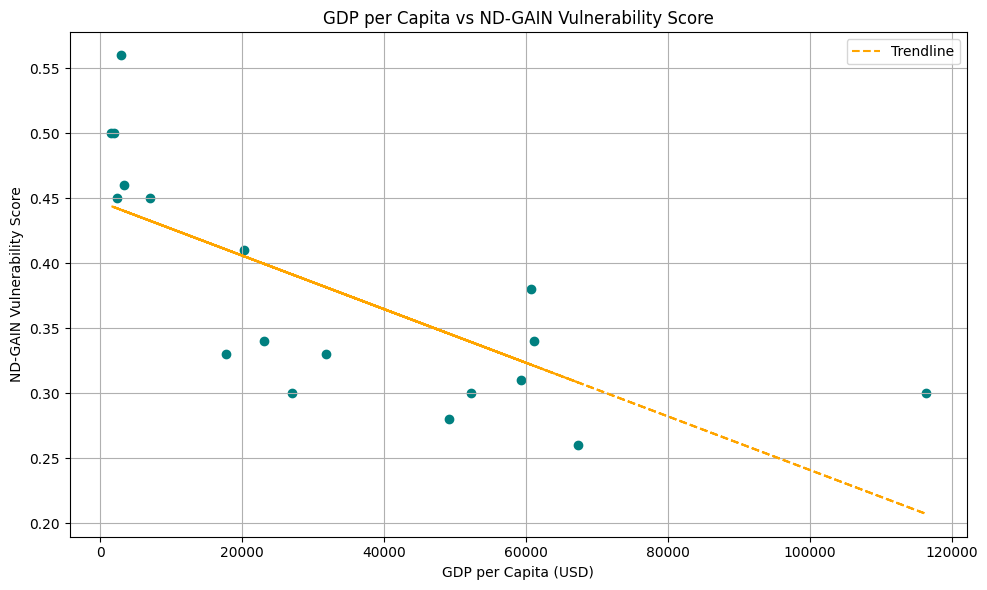

In [83]:
import matplotlib.pyplot as plt
import numpy as np

x = df_filtered['GDP per Capita (USD)']
y = df_filtered['ND-GAIN Vulnerability Score']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='teal')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='orange', linestyle='--', label='Trendline')
plt.title('GDP per Capita vs ND-GAIN Vulnerability Score')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('ND-GAIN Vulnerability Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### 📊 Inference:

- ✅ The analysis shows that **countries with higher GDP per Capita generally exhibit lower ND-GAIN Vulnerability Scores**, highlighting an inverse relationship between economic strength and climate vulnerability.
- ✅ This suggests that **wealthier countries tend to be better equipped to manage climate risks**, likely due to improved infrastructure, early warning systems, and adaptive policies.
- ✅ Countries with **lower GDP per Capita** show higher vulnerability scores, indicating that **economic constraints may limit their ability to respond to climate challenges effectively**.
- ✅ While the trend is clear, some deviations indicate that **GDP alone may not be a sole determinant of climate vulnerability**, and additional factors like governance quality, geographical exposure, and institutional readiness also play critical roles.

---

### 📌 Hypothesis:

> Countries with **higher GDP per Capita** tend to have **lower climate vulnerability** due to their **greater capacity to invest in adaptation, infrastructure, and climate resilience measures**.

> However, while **economic prosperity helps mitigate vulnerability**, a **multidimensional approach** is necessary—one that integrates **environmental governance, social development, and strategic planning** for sustainable climate resilience.


### ECONOMICAL ASPECTS

**RQ#2** *How does a country’s expenditure on environmental protection, relative to its GDP, influence its climate vulnerability?*

In [76]:
import pandas as pd

df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
gov_expenditure_data = pd.read_csv('./datasets-drive/Investment_GovernmentExpenditure_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')

df_climate['Country'] = df_climate['Country'].str.strip()
gov_expenditure_data['Area'] = gov_expenditure_data['Area'].str.strip()
df_climate['GDP per Capita (USD)'] = df_climate['GDP per Capita (USD)'].astype(str).str.replace(',', '')
df_climate['GDP per Capita (USD)'] = pd.to_numeric(df_climate['GDP per Capita (USD)'], errors='coerce')
df_climate['ND-GAIN Vulnerability Score'] = pd.to_numeric(df_climate['ND-GAIN Vulnerability Score'], errors='coerce')

env_exp_usd = gov_expenditure_data[
    (gov_expenditure_data['Item'].str.contains('Environmental protection', case=False, na=False)) &
    (gov_expenditure_data['Element'].str.contains(r'Value US\$', case=False, na=False))
]

env_exp_usd = env_exp_usd.sort_values('Year', ascending=False).drop_duplicates('Area')
env_exp_usd = env_exp_usd[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Env_Exp_USD'})
env_exp_usd['Env_Exp_USD'] = pd.to_numeric(env_exp_usd['Env_Exp_USD'], errors='coerce')

climate_features = df_climate[['Country', 'GDP per Capita (USD)', 'ND-GAIN Vulnerability Score']]
merged_df = pd.merge(env_exp_usd, climate_features, on='Country', how='inner')
merged_df = merged_df.dropna().reset_index(drop=True)
selected_countries = top_10_affected + bottom_10_affected

merged_df = merged_df[merged_df['Country'].isin(selected_countries)].reset_index(drop=True)

merged_df['Vulnerability_Level'] = pd.cut(
    merged_df['ND-GAIN Vulnerability Score'],
    bins=[0, 0.4, 0.6, 1.0],
    labels=['High', 'Moderate', 'Low']
)


/var/folders/33/tmt_dn957d99k_t2zvbqlw_40000gn/T/ipykernel_17725/989257858.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_exp_by_vul = merged_df.groupby('Vulnerability_Level')['Env_Exp_USD'].mean().sort_index()


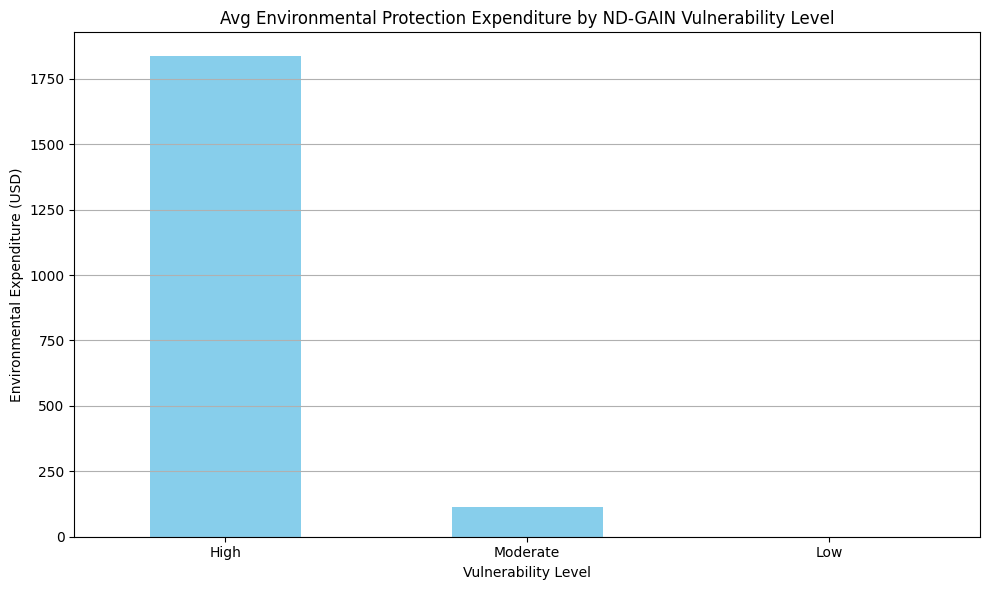

In [77]:
import matplotlib.pyplot as plt

avg_exp_by_vul = merged_df.groupby('Vulnerability_Level')['Env_Exp_USD'].mean().sort_index()

plt.figure(figsize=(10, 6))
avg_exp_by_vul.plot(kind='bar', color='skyblue')

plt.title('Avg Environmental Protection Expenditure by ND-GAIN Vulnerability Level')
plt.xlabel('Vulnerability Level')
plt.ylabel('Environmental Expenditure (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 📊 Inference:

- ✅ **Average Environmental Expenditure (USD)** is highest among countries with **high climate vulnerability**, indicating that these countries allocate more funds toward environmental protection.
- ✅ This suggests a **reactive spending pattern**, where governments invest **after** vulnerability levels have escalated, rather than through early mitigation.
- ✅ **Low vulnerability countries** show comparatively lower environmental expenditure, possibly indicating that their **earlier proactive policies or better preparedness** have reduced the need for high current spending.

---

### 📌 Hypothesis:

> **Higher ND-GAIN vulnerability scores** are associated with **higher government environmental expenditure**, implying that governments may prioritize environmental protection **more as climate risk increases**.

> **Policy Recommendation**: Shifting from **reactive** to **proactive investment strategies** can help nations reduce future climate risk. Early-stage budgeting for sustainability, clean tech, and resilient infrastructure may be more impactful in the long run.



### DEMOGRAPHICAL ASPECTS

**RQ#3** *Do countries with higher birth rates or younger population have greater climate stress?*

In [32]:
import pandas as pd

df_demo = pd.read_csv('./datasets/3-countries-demographic-stats.csv')
df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
df_social = pd.read_csv('./datasets/7-social_data.csv')

df_demo['Country'] = df_demo['Country'].str.strip()
df_climate['Country'] = df_climate['Country'].str.strip()
df_social['Country'] = df_social['Country'].str.strip()

demo_features = df_demo[['Country', 'Births per Day']]
climate_features = df_climate[['Country', 'ND-GAIN Vulnerability Score']]
age_data = df_social[df_social['Indicator'].str.contains('0-14', case=False, na=False)]
age_data = df_social[df_social['Indicator'].str.contains('0-14', case=False, na=False)]
age_data = age_data.sort_values('Year', ascending=False).drop_duplicates('Country')
age_data['Country'] = age_data['Country'].str.strip()
age_data['Value'] = age_data['Value'].astype(str).str.strip().str.split('/').str[0].str.strip()
age_data['Value'] = pd.to_numeric(age_data['Value'], errors='coerce')
age_features = age_data[['Country', 'Value']].rename(columns={'Value': '% Population aged 0-14'})


merged_df = pd.merge(demo_features, age_features, on='Country', how='left')
merged_df = pd.merge(merged_df, climate_features, on='Country', how='left')
merged_df['High_Vulnerability'] = merged_df['Country'].apply(lambda x: 1 if x.strip() in top_10_affected else (0 if x.strip() in bottom_10_affected else None))
merged_df = merged_df[merged_df['High_Vulnerability'].notnull()].reset_index(drop=True)

merged_df['Births per Day'] = merged_df['Births per Day'].astype(str).str.replace(',', '', regex=False)
merged_df['Births per Day'] = pd.to_numeric(merged_df['Births per Day'], errors='coerce')
merged_df['% Population aged 0-14'] = pd.to_numeric(merged_df['% Population aged 0-14'], errors='coerce')
merged_df['ND-GAIN Vulnerability Score'] = pd.to_numeric(merged_df['ND-GAIN Vulnerability Score'], errors='coerce')

print("Merged clean dataset:")
display(merged_df.head())


Merged clean dataset:


,Country,Births per Day,% Population aged 0-14,ND-GAIN Vulnerability Score,High_Vulnerability
0,China,23845,17.6,NaN,1.0
1,Dominica,2,NaN,0.45,1.0
2,Denmark,162,16.3,0.34,0.0
3,Spain,904,14.2,0.30,1.0
4,Estonia,29,16.5,0.34,0.0


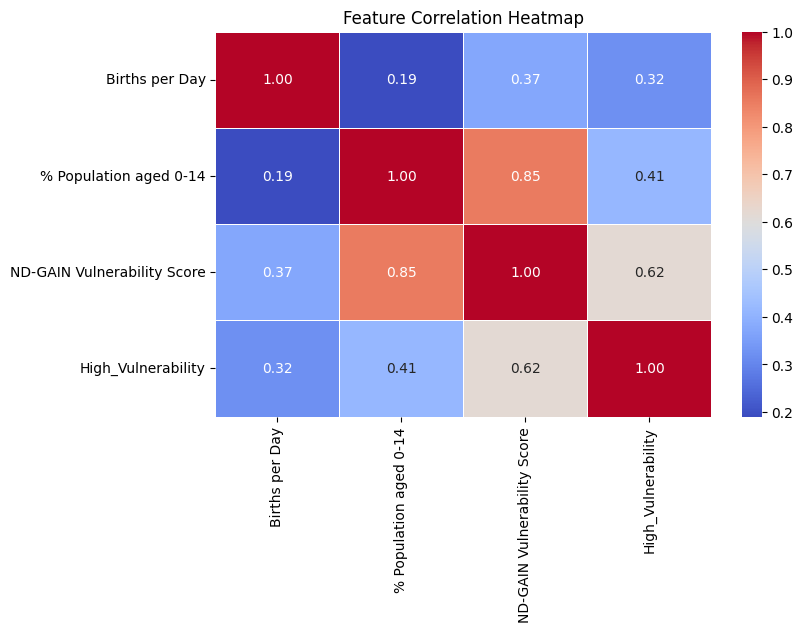

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
corr = merged_df[['Births per Day', '% Population aged 0-14', 'ND-GAIN Vulnerability Score', 'High_Vulnerability']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### 📊 Inference:

- ✅ **ND-GAIN Vulnerability Score** shows a strong positive correlation (**0.85**) with **% Population aged 0-14**, indicating that countries with a higher percentage of younger population tend to have higher climate vulnerability.
- ✅ **ND-GAIN Score** also correlates well (**0.62**) with the **High_Vulnerability** classification, confirming it as a strong indicator of climate risk.
- ✅ **Births per Day** shows a moderate correlation (~**0.32**) with **High_Vulnerability**, but is not as impactful as age distribution or ND-GAIN score.
- ✅ **% Population aged 0-14** also correlates moderately (**0.41**) with **High_Vulnerability**, further supporting that demographics play a key role in climate sensitivity.

---

### 📌 Hypothesis:

> Social and demographic factors, especially a younger population profile, appear to be important contributors to a country’s climate vulnerability.

> Measures: Economic or policy interventions may need to consider **age structure** when planning **resilience strategies**.

